Concepts and data from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani " available at [www.StatLearning.com](http://www.StatLearning.com).

For Tables reference see [http://data8.org/datascience/tables.html](http://data8.org/datascience/tables.html)

http://jeffskinnerbox.me/notebooks/matplotlib-2d-and-3d-plotting-in-ipython.html


In [49]:
# HIDDEN
# For Tables reference see http://data8.org/datascience/tables.html
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
from sklearn import linear_model
plots.style.use('fivethirtyeight')
plots.rc('lines', linewidth=1, color='r')
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
# datascience version number of last run of this notebook
version.__version__


import sys
sys.path.append("..")
from ml_table import ML_Table

import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

'en_US.UTF-8'

# Acquiring and seeing trends in multidimensional data

In [50]:
# Getting the data
advertising = ML_Table.read_table("./data/Advertising.csv")
advertising.relabel(0, "id")

id,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1,4.8
10,199.8,2.6,21.2,10.6


FIGURE 3.1. For the Advertising data, the least squares fit for the regression of sales onto TV is shown. The fit is found by minimizing the sum of squared errors. 

Each line segment represents an error, and the fit makes a compromise by averaging their squares. In this case a linear fit captures the essence of the relationship, although it is somewhat deficient in the left of the plot.

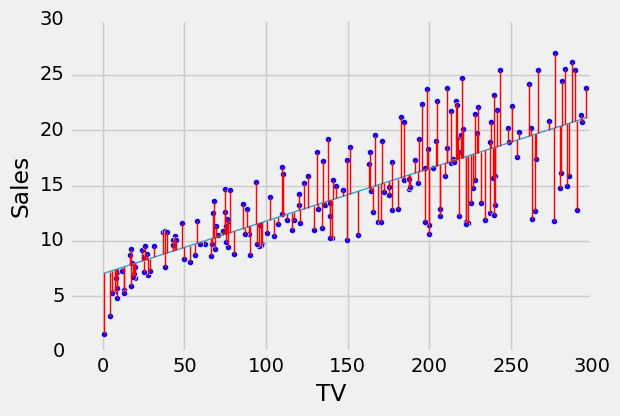

In [51]:
ax = advertising.plot_fit_1d('Sales', 'TV', advertising.regression_1d('Sales', 'TV'))
_ = ax.set_xlim(-20,300)

In [52]:
lr = advertising.linear_regression('Sales', 'TV')

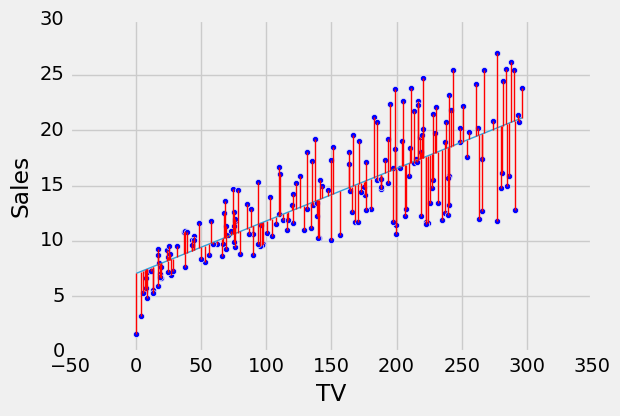

In [5]:
advertising.plot_fit_1d('Sales', 'TV', lr.model)

In [48]:
advertising.lm_summary_1d('Sales', 'TV')

Param,Coefficient,Std Error,t-statistic,95% CI,99% CI
intercept,7.03259,0.457843,15.3603,[ 6.11690767 7.94827943],[ 5.65906473 8.40612237]
TV,0.0475366,0.00269061,17.6676,[ 0.04215543 0.05291785],[ 0.03946482 0.05560846]


Let $\hat{y}_i =  \hat{\beta_0} + \hat{\beta_1}x_i$ be the prediction for $Y$ based on the $i$-th value of $X$.

In [7]:
# Get the actual parameters that are captured within the model
advertising.regression_1d_params('Sales', 'TV')

(7.0325935491276965, 0.047536640433019729)

In [8]:
# Regression yields a model.  The computational representation of a model is a function
# That can be applied to an input, 'TV' to get an estimate of an output, 'Sales'
advertise_model_tv = advertising.regression_1d('Sales', 'TV')

In [9]:
# Sales with no TV advertising
advertise_model_tv(0)

7.0325935491276965

In [10]:
# Sales with 100 units TV advertising
advertise_model_tv(100)

11.786257592429671

In [11]:
# Here's the output of the model applied to the input data
advertise_model_tv(advertising['TV'])

array([ 17.97077451,   9.14797405,   7.85022376,  14.23439457,
        15.62721814,   7.44616232,   9.76595037,  12.74649773,
         7.44140866,  16.53041431,  10.17476548,  17.23871025,
         8.16396559,  11.66741599,  16.73482186,  16.32125309,
        10.25557777,  20.40940417,  10.32212907,  14.03474068,
        17.41459582,  18.31779199,   7.6600772 ,  17.88520856,
         9.99412625,  19.52997632,  13.82557947,  18.44614092,
        18.85970969,  10.38868036,  20.95607553,  12.39948025,
        11.653155  ,  19.65832525,  11.58185004,  20.85149492,
        19.72012288,  10.58358059,   9.08142275,  17.87094757,
        16.65876324,  15.44657891,  20.98935118,  16.86792445,
         8.22576322,  15.35625929,  11.2966302 ,  18.43663359,
        17.83291826,  10.21279479,  16.53041431,  11.80527225,
        17.31952254,  15.71278409,  19.52046899,  16.48763133,
         7.37961102,  13.50708398,  17.05331735,  17.04856369,
         9.57580381,  19.45391769,  18.4081116 ,  11.91

The *residual* is the difference between the model output and the observed output

In [12]:
residual = advertising['Sales'] - advertise_model_tv(advertising['TV'])
residual

array([ 4.12922549,  1.25202595,  1.44977624,  4.26560543, -2.72721814,
       -0.24616232,  2.03404963,  0.45350227, -2.64140866, -5.93041431,
       -1.57476548,  0.16128975,  1.03603441, -1.96741599,  2.26517814,
        6.07874691,  2.24442223,  3.99059583,  0.97787093,  0.56525932,
        0.58540418, -5.81779199, -2.0600772 , -2.38520856, -0.29412625,
       -7.52997632,  1.17442053, -2.54614092,  0.04029031,  0.11131964,
        0.44392447, -0.49948025, -2.053155  , -2.25832525, -2.08185004,
       -8.05149492,  5.67987712,  4.11641941,  1.01857725,  3.62905243,
       -0.05876324,  1.65342109, -0.28935118, -3.96792445,  0.27423678,
       -0.45625929, -0.6966302 ,  4.76336641, -3.03291826, -0.51279479,
       -5.13041431, -1.10527225,  5.28047746,  5.48721591,  0.67953101,
        7.21236867, -1.87961102, -0.30708398,  6.74668265,  1.35143631,
       -1.47580381,  4.74608231, -2.7081116 ,  2.08539348,  4.73535289,
       -1.01262174,  0.97000228, -0.25444756,  0.58220801,  4.96

The residual is not very useful directly because balances over-estimates and under-estimates to produce the best overall estimate with the least error.  We can understand the overall goodness of fit by the *residual sum of squares* - RSS.

In [13]:
# Residual Sum of Squares
RSS = sum(residual*residual)
RSS

2102.5305831313512

In [14]:
# This is common enough that we have it provided as a method
advertising.RSS_model('Sales', advertising.regression_1d('Sales', 'TV'), 'TV')

2102.5305831313508

In [15]:
# And we should move toward a general regression framework
advertising.RSS_model('Sales', advertising.linear_regression('Sales', 'TV').model, 'TV')

2102.5305831313512

With this, we can build an independent model for each of the inputs and look at the associates RSS.

In [16]:
advertising_models = Table().with_column('Input', ['TV', 'Radio', 'Newspaper'])
advertising_models['Model'] = advertising_models.apply(lambda i: advertising.regression_1d('Sales', i), 'Input')
advertising_models['RSS'] = advertising_models.apply(lambda i, m: advertising.RSS_model('Sales', m, i), ['Input', 'Model'])
advertising_models

Input,Model,RSS
TV,. at 0x ...,2102.53
Radio,. at 0x ...,3618.48
Newspaper,. at 0x ...,5134.8


In [17]:
advertising_models = Table().with_column('Input', ['TV', 'Radio', 'Newspaper'])
advertising_models['Model'] = advertising_models.apply(lambda i: advertising.linear_regression('Sales', i).model, 'Input')
advertising_models['RSS'] = advertising_models.apply(lambda i, m: advertising.RSS_model('Sales', m, i), ['Input', 'Model'])
advertising_models

Input,Model,RSS
TV,. a ...,2102.53
Radio,. a ...,3618.48
Newspaper,. a ...,5134.8


We can look at how well each of these inputs predict the output by visualizing the residuals.
The magnitude of the RSS gives a sense of the error.

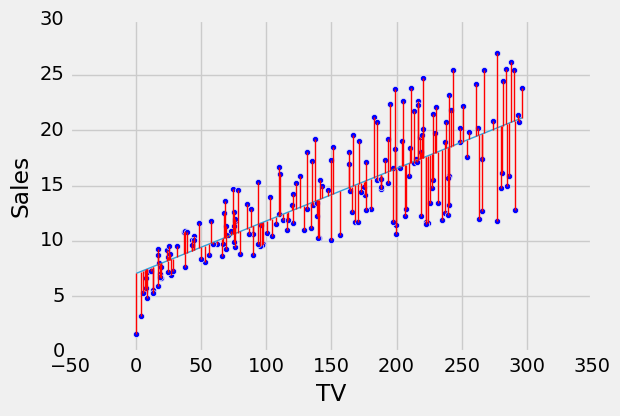

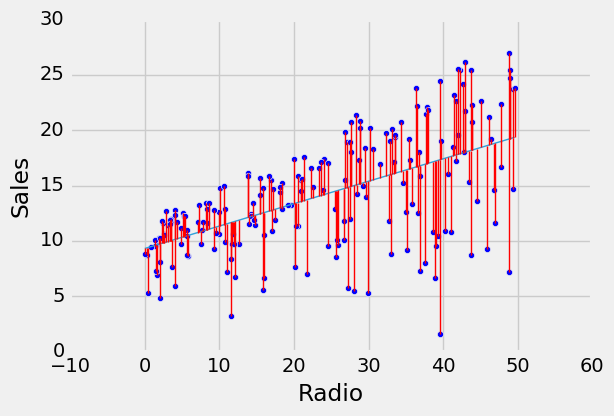

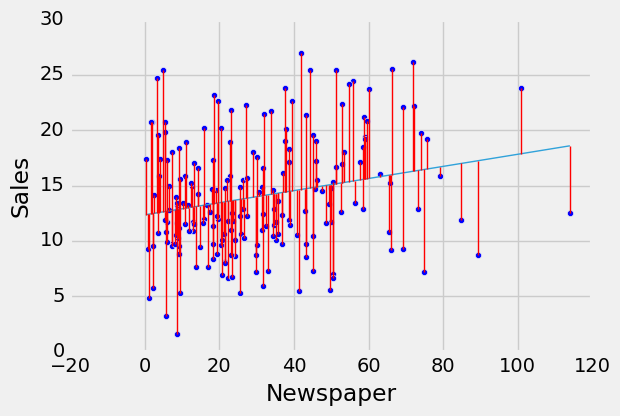

In [18]:
for mode, mdl in zip(advertising_models['Input'], advertising_models['Model']) :
    advertising.plot_fit_1d('Sales', mode, mdl)

In [19]:
# RSS at arbitrary point
res = lambda b0, b1: advertising.RSS('Sales', b0 + b1*advertising['TV'])

In [20]:
res(7.0325935491276965, 0.047536640433019729)

2102.5305831313508

## Figure 3.2 - RSS and least squares regression

Regression using least squares finds parameters $b0$ and $b1$ tohat minimize the RSS.  The least squares regression line estimates the *population regression line*.

Figure 3.2 shows (what is claimed to be) the RSS contour and surface around the regression point.  The computed analog of Figure 3.2 is shown below, with the role of $b0$ and $b1$ reversed to match the tuple returned from the regression method. The plot is the text is incorrect is some important ways.  The RSS is not radially symmetric around ($b0$, $b1$).  Lines with a larger intercept and smaller slope or vice versa are very close to the minima, i.e., the surface is nearly flat along the upper-left to lower-right diagonal, especially where fit is not very good, since the output depends on more than this one input.

Just because a process minimizes the error does not mean that the minima is sharply defined or that the error surface has no structure.  Below we go a bit beyond the text to illustrate this more fully.

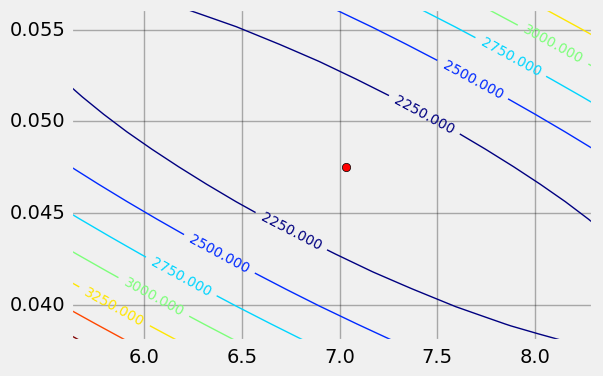

In [21]:
ax = advertising.RSS_contour('Sales', 'TV', sensitivity=0.2)

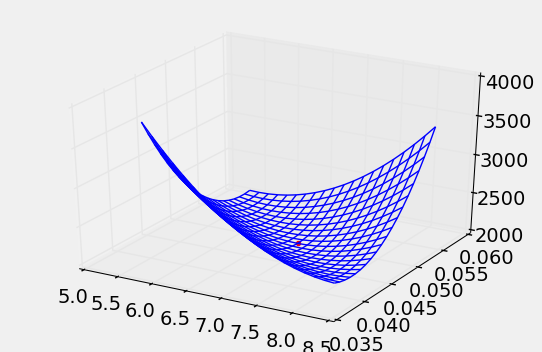

In [22]:
ax = advertising.RSS_wireframe('Sales', 'TV', sensitivity=0.2)

In [23]:
# The minima point
advertising.linear_regression('Sales', 'TV').params

(7.032593549127693, array([ 0.04753664]))

[2152.1942799600001,
 2121.3260830399995,
 2112.4219749999997,
 2165.1585052400001]

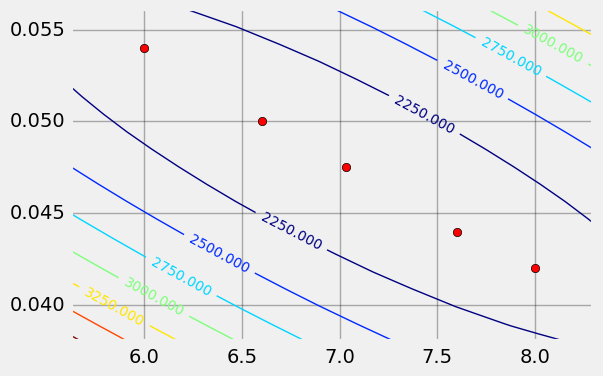

In [24]:
# Some other points along the trough
points = [(0.042, 8.0), (0.044, 7.6), (0.050, 6.6), (0.054, 6.0)]
ax = advertising.RSS_contour('Sales', 'TV', sensitivity=0.2)
ax.plot([b0 for b1, b0 in points], [b1 for b1, b0 in points], 'ro')
[advertising.RSS('Sales', b0 + b1*advertising['TV']) for b1,b0 in points]

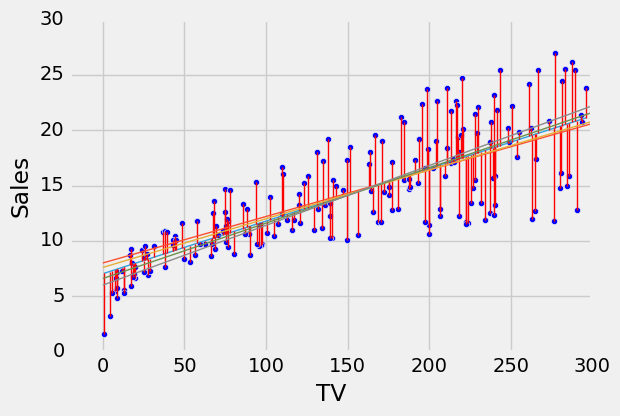

In [25]:
# Models as lines corresponding to points along the near-minimal vectors.
ax = advertising.plot_fit_1d('Sales', 'TV', advertising.linear_regression('Sales', 'TV').model)
for b1, b0 in points:
    fit = lambda x: b0 + b1*x
    ax.plot([0, 300], [fit(0), fit(300)])
_ = ax.set_xlim(-20,300)

### 3.1.2 Assessing the accuracy of coefficient estimates

The particular minima that is found through least squares regression is effected by the particular sample of the population that is observed and utilized for estimating the coefficients of the underlying population model.  

To see this we can generate a synthetic population based on an ideal model plus noise.  Here we can peek at the entire population (which in most settings cannot be observed).  We then take samples of this population and fit a regression to those.  We can then see how these regression lines differ from the population regression line, which is not exactly the ideal model.

In [26]:
def model (x):
    return 3*x + 2

def population(n, noise_scale = 1):
    sample = ML_Table.runiform('x', n, -2, 2)
    noise = ML_Table.rnorm('e', n, sd=noise_scale)
    sample['Y'] = sample.apply(model, 'x') + noise['e']
    return sample

In [27]:
data = population(100, 2)

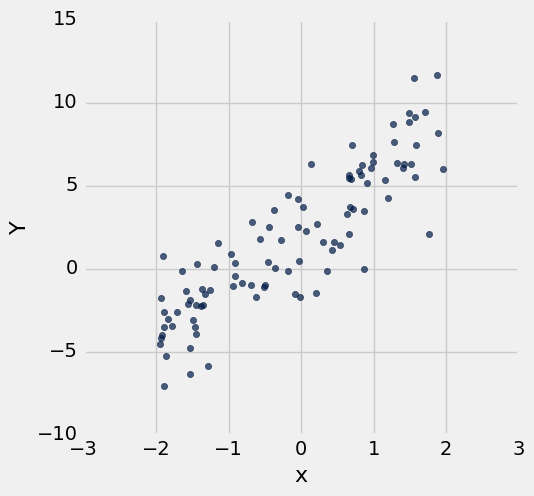

In [28]:
data.scatter('x')

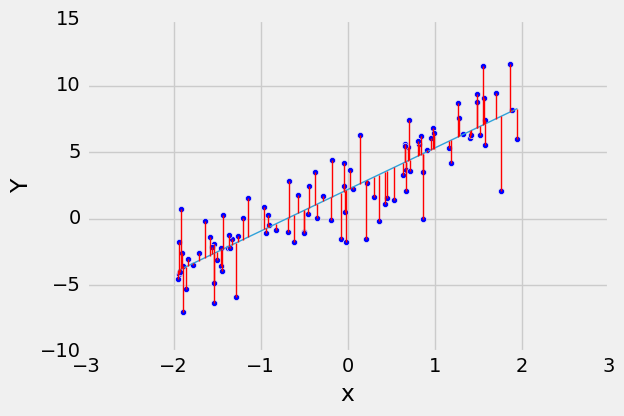

In [29]:
ax = data.plot_fit('Y', data.linear_regression('Y').model)

In [30]:
data.linear_regression('Y').params

(2.1918918645804979, array([ 3.12848859]))

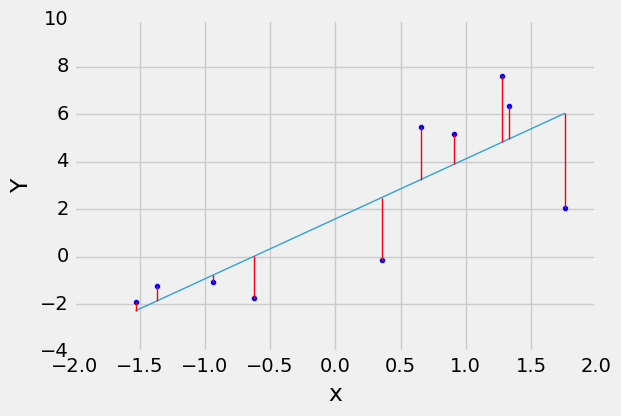

In [31]:
# A random sample of the population
sample = data.sample(10)
sample.plot_fit('Y', sample.linear_regression('Y').model)

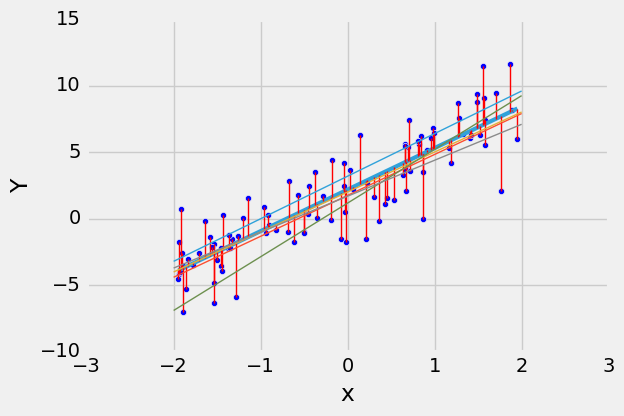

In [32]:
nsamples = 5
ax = data.plot_fit('Y', data.linear_regression('Y').model, linewidth=3)
for s in range(nsamples):
    fit = data.sample(10).linear_regression('Y').model
    ax.plot([-2, 2], [fit(-2), fit(2)], linewidth=1)

"The property of unbiasedness holds for the least squares coefficient estimates given by (3.4) as well: if we estimate β0 and β1 on the basis of a particular data set, then our estimates won’t be exactly equal to β0 and β1. But if we could average the estimates obtained over a huge number of data sets, then the average of these estimates would be spot on!"

To compute the standard errors associated with $β_0$ and $β_1$, we use the following formulas.

The slope, $b_1$:

$SE(\hat{β_1})^2 = \frac{σ^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$

The intercept, $b_0$:

$SE(\hat{β_0})^2 = σ^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2} ] $,



where $σ^2 = Var(ε)$. 

In general, $σ^2$ is not known, but can be estimated from the data.
The estimate of σ is known as the *residual standard error*, and is given by the formula
$RSE = \sqrt{RSS/(n − 2)}$.

In [33]:
adv_sigma = advertising.RSE_model('Sales', advertising.linear_regression('Sales', 'TV').model, 'TV')

In [34]:
adv_sigma

3.2586563686504624

In [35]:
b0, b1 = advertising.linear_regression('Sales', 'TV').params
b0, b1

(7.032593549127693, array([ 0.04753664]))

In [36]:
advertising.RSS_model('Sales', advertising.linear_regression('Sales', 'TV').model, 'TV')

2102.5305831313512

In [37]:
SE_b0, SE_b1 = advertising.SE_1d_params('Sales', 'TV')
SE_b0, SE_b1

(0.45784294027347844, 0.0026906071877968703)

In [38]:
# b0 95% confidence interval
(b0-2*SE_b0, b0+2*SE_b0)

(6.116907668580736, 7.94827942967465)

In [39]:
# b1 95% confidence interval
(b1-2*SE_b1, b1+2*SE_b1)

(array([ 0.04215543]), array([ 0.05291785]))

In [40]:
# t-statistic of the slope
b0/SE_b0

15.360275174117545

In [41]:
# t-statistics of the intercept
b1/SE_b1

array([ 17.6676256])

In [42]:
# Similar to summary of a linear model in R
advertising.lm_summary_1d('Sales', 'TV')

Param,Coefficient,Std Error,t-statistic,95% CI,99% CI
intercept,7.03259,0.457843,15.3603,[ 6.11690767 7.94827943],[ 5.65906473 8.40612237]
TV,0.0475366,0.00269061,17.6676,[ 0.04215543 0.05291785],[ 0.03946482 0.05560846]


In [43]:
# We can just barely reject the null hypothesis for Newspaper
# advertising effecting sales
advertising.lm_summary_1d('Sales', 'Newspaper')

Param,Coefficient,Std Error,t-statistic,95% CI,99% CI
intercept,12.3514,0.62142,19.8761,[ 11.10856669 13.59424744],[ 10.48714651 14.21566763]
Newspaper,0.0546931,0.0165757,3.29959,[ 0.02154165 0.08784454],[ 0.00496593 0.10442026]


## 3.1.3 Assessing the Acurracy of the Model

Once we have rejected the null hypothesis in favor of the alternative hypothesis, it is natural to want to quantify the extent to which the model fits the data. The quality of a linear regression fit is typically assessed using two related quantities: the residual standard error (RSE) and the $R^2$ statistic.

The RSE provides an absolute measure of lack of fit of the model to the data.

In [44]:
adver_model = advertising.regression_1d('Sales', 'TV')
advertising.RSE_model('Sales', adver_model, 'TV')

3.2586563686504619

The $R^2$ statistic provides an alternative measure of fit. It takes the form of a proportion—the proportion of variance explained—and so it always takes on a value between 0 and 1, and is independent of the scale of Y.

To calculate $R^2$, we use the formula

$R^2 = \frac{TSS−RSS}{TSS} = 1 − \frac{RSS}{TSS}$

where $TSS = \sum (y_i - \bar{y})^2$ is the *total sum of squares*.

In [45]:
advertising.R2_model('Sales', adver_model, 'TV')

0.61187505085007121

In [46]:
# the other models of advertising suggest that there is more going on
advertising.R2_model('Sales', adver_model, 'Radio')

-1.1406293912097016

In [47]:
advertising.R2_model('Sales', adver_model, 'Newspaper')

-1.0808654511451161